In [140]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns
plt.rcParams['figure.figsize'] = (20, 10)

# Control 2: Transformaciones

Jerónimo Aranda 150344  
Emiliano Zambrano 157043  
Jorge Rotter  158391 

## 2.1
Utilice el Método Delta (aproximación en expansión en Series de Taylor, propagación del error), para justificar que si
\begin{align}
\sigma^{2}_{y}\propto [E(y)]^{3}
\end{align}
$g(y)=\frac{1}{\sqrt{y}}$, es la transformación que estabiliza la varianza. Esto es, $\sigma^{2}_{g}\propto constante$.

$Y$ es una variable aleatoria tal que $Var(y)=\sigma^{2}_{y}\propto [E(y)]^{3}$, sea $E(y)=\mu$. Asimismo, la función $g(y)$ es diferenciable, por lo tanto es razonable aproximar la función de distribución de $g(y)$ utilizando el Método Delta de propagación del error. Esto es, se puede aproximar linealmente la distribución de $g(y)$ de la siguiente manera:
\begin{align}
g(y)\approx g(\mu)+g'(\mu)(y-\mu)=\frac{1}{\sqrt{\mu}}-\frac{1}{2}\mu^{-\frac{3}{2}}(y-\mu)
\end{align}
De la anterior expresión, se sigue que la varianza de $g$ se puede aproximar como:

\begin{align}
Var(g(y))\approx \sigma^{2}_{y} g'(\mu)^{2}=\mu^{3} (-\frac{1}{2}\mu^{-\frac{3}{2}})^{2}=\frac{1}{4}\mu^{3}\mu^{-3}=\frac{1}{4}
\end{align}

De esta manera, se observa que $Var(g(y))\propto \frac{1}{4}$, por lo tanto es válido concluir que la transformación que estabiliza la varianza de una variable aleatoria con las anteriores características está dada por $g$.
## 2.2
Muestre que la transformación potencia de Box-Cox:
   \begin{equation}
  y^{(\lambda)} =
    \begin{cases}
      \frac{y^{\lambda}-1}{\lambda\dot{y}^{\lambda-1}}, & \lambda\neq 0\\
      \dot{y}logy, & \lambda=0
    \end{cases}       
\end{equation}
como función de $\lambda$, es continua en $\lambda=0$. En la expresión anterior, $\dot{y}=(\Pi^{n}_{i=1} y_{i})^{\frac{1}{n}}$ es el promedio geométrico de las respuestas $y_{i}$.

Para demostrar la continuidad en $\lambda=0$, se prueba que el límite cuando $\lambda$ tiende a 0 de la función $y^{\lambda}$, coincide con el valor de la función en 0, esto es:
\begin{align}
\displaystyle\lim_{\lambda \to 0} y^{(\lambda)}=y^{0}=\dot{y}logy
\end{align}

Se comienza con la siguiente igualdad.
\begin{align}
\displaystyle\lim_{\lambda \to 0} y^{(\lambda)}=\displaystyle\lim_{\lambda \to 0} \frac{y^{\lambda}-1}{\lambda\dot{y}^{\lambda-1}}
\end{align}
Sean $f(\lambda)=y^{\lambda}-1$ y $g(\lambda)=\lambda\dot{y}^{\lambda-1}$, es claro que f es una función diferenciable con respecto a $\lambda$, puesto que es una función exponencial menos una función constante; luego, g es el producto de una función lineal y una función exponencial, es decir es el producto de dos funciones diferenciables, por lo tanto g es también diferenciable. Asimismo, al ser diferenciables ambas funciones son continuas, esto es:
\begin{align}
&\displaystyle\lim_{\lambda \to 0}f(\lambda)=y^{0}-1=0 \\
&\displaystyle\lim_{\lambda \to 0}g(\lambda)=0\dot{y}^{0-1}=0
\end{align}
De esta manera, es claro que se tiene una indeterminación del tipo $\frac{0}{0}$ en el límite que se quiere calcular. También, ambas funciones en el cociente son diferenciables. Por lo tanto, el cálculo del límite se puede hacer a través de la Regla de L'Hôpital:
\begin{align}
&\displaystyle\lim_{\lambda \to 0}\frac{f(\lambda)}{g(\lambda)}=\displaystyle\lim_{\lambda \to 0}\frac{f'(\lambda)}{g'(\lambda)}
\end{align}

Se hace el cálculo de las derivadas:
\begin{align}
&f'(\lambda)=y^{\lambda}logy\\
&g'(\lambda)=\dot{y}^{\lambda-1}+\lambda\dot{y}^{\lambda-1}log\dot{y}
\end{align}
                                                                                                                    
Y se procede a calcular el límite del cociente:
\begin{align}
\displaystyle\lim_{\lambda \to 0}\frac{f'(\lambda)}{g'(\lambda)}=\displaystyle\lim_{\lambda \to 0}\frac{y^{\lambda}logy}{\dot{y}^{\lambda-1}+\lambda\dot{y}^{\lambda-1}log\dot{y}}=\frac{y^{0}logy}{\dot{y}^{-1}+0}=\frac{logy}{\dot{y}^{-1}}=\dot{y}logy
\end{align}

Se concluye que $\displaystyle\lim_{\lambda \to 0} y^{\lambda}=\dot{y}logy=y^{0}$, por lo tanto la función $y^{(\lambda)}$ es continua en $\lambda=0$.
                                                                                                                    
## 2.3
### Estudio comparativo entre consumo de agua ($m^2/mes$) y consumo de energía eléctrica ($kw/hr$).
#### 2.2.a) Grafique los datos y comente.
Leámos los datos:

In [261]:
datos=pd.read_csv('lista04.csv')
datos.head()

,obs.,c.elec,c.agua
0,1,0.16,3.756385
1,2,0.44,4.048329
2,3,0.63,4.255507
3,4,0.76,4.373823
4,5,1.04,4.506255


**Tabla 1.** datos

Grafiquemos los datos:

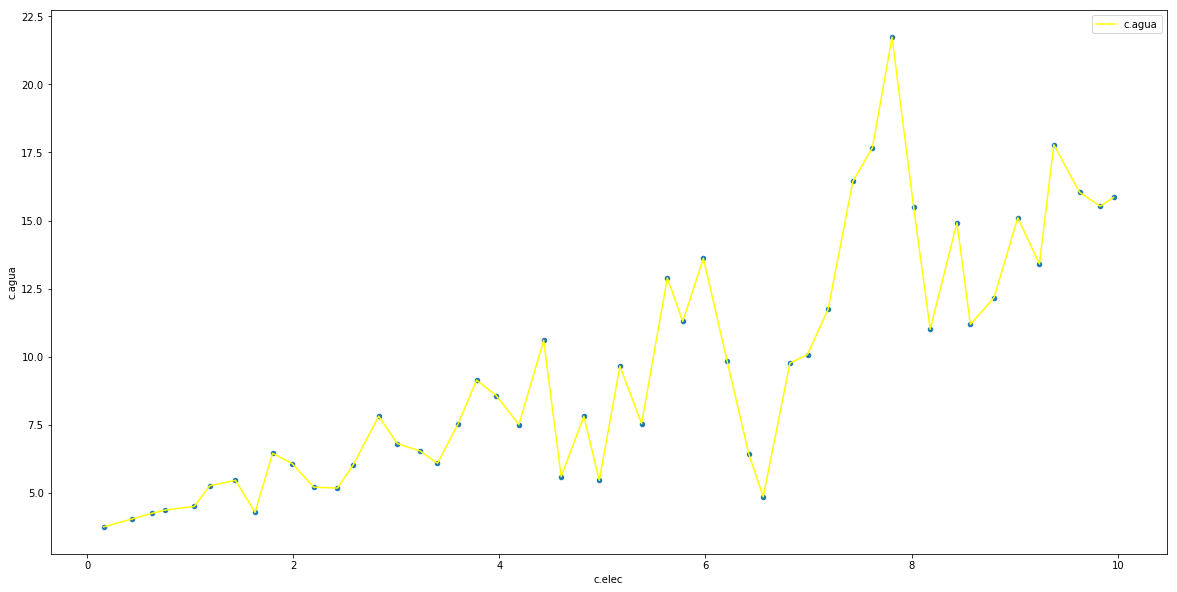

In [262]:
ax=datos.plot(x='c.elec',y='c.agua',color='yellow')
ax=datos.plot.scatter(x='c.elec',y='c.agua',ax=ax)

<center> <b>Figura 1.</b> c.elec vs.cagua </center>
<p>
Parece que una recta podría ser un buen candidato para modelar los datos sin embargo entre los 6 y 8 $kw/hr$ parece haber un incremento en la varianza de los datos a comparación de fuera del íntervalo $(6,8)$ $kw/hr$, decidimos graficar tambien las interpolaciones lineales entre las observaciones pues sin estas no se alcanzaba a apreciar el incremento en la varianza.

#### 2.2.b) Ajuste un modelo de regresión lineal simple sobre los datos sin transformar.

Ajustemos nuestro modelo lineal de la librería `sklearn`.

In [354]:
X=np.array(datos['c.elec'])
X=X.reshape((X.shape[0],1))
y=np.array(datos['c.agua'])
lm = linear_model.LinearRegression()
model = lm.fit(X,y)
Y=model.predict(X)
datos['modelo ajustado']=Y
datos.head()

,obs.,c.elec,c.agua,modelo ajustado,Transformacion Box-Cox,modelo ajustado a transformacion,modelo ajustado a transformación
0,1,0.16,3.756385,3.092436,1.248115,1.248115,1.726871
1,2,0.44,4.048329,3.457089,1.314384,1.314384,2.470121
2,3,0.63,4.255507,3.704531,1.358327,1.358327,2.962977
3,4,0.76,4.373823,3.873834,1.382388,1.382388,3.232849
4,5,1.04,4.506255,4.238487,1.408494,1.408494,3.525641


**Tabla 2.** Podemos observar que la columna `modelo ajustado` se anexó a nuestro dataframe.

Procedamos a graficar nuestro modelo ajustado:

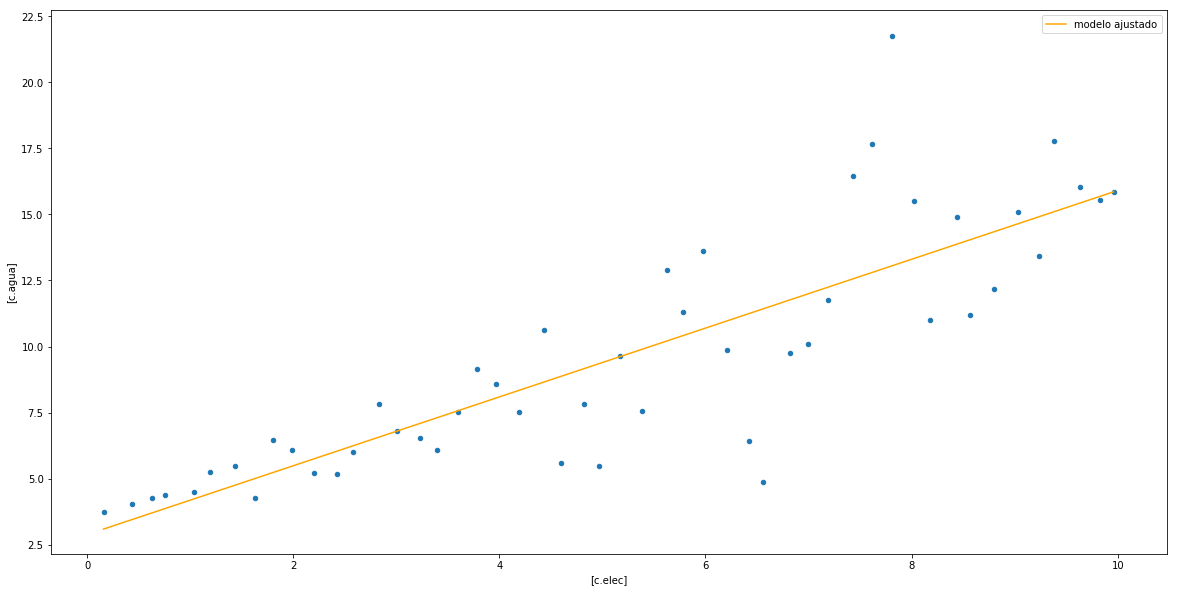

In [286]:
ax=datos.plot(x='c.elec',y='modelo ajustado',color='orange')
ax=datos.plot.scatter(x=['c.elec'],y=['c.agua'],ax=ax)

<center><b>Figura 2.</b> Nuestro modelo ajustado parece aproximar bien a nuestros datos.</center>
<p>
Con $\beta0$ dada por:

In [330]:
model.intercept_

-12.271742365104288

y $\beta1$ dada por:

In [331]:
model.coef_[0]

11.215800032456846

#### 2.2.c) Verifique su modelo via análisis de residuales. Comente.
Procedamos al análisis de residuales.

La $R^2$ fue de:

In [318]:
model.score(X,y)

0.7086636247549499

<mark>falta</mark>

#### 2.2.d) Aplique la transformación Box-Cox.
Transformemos nuestra respuesta con **Box-Cox**:

Para esto usaremos la función `scipy.stats.boxcox` que implementa la transformación potencia **Box-Cox** con la siguiente función de python:
```p
y = (x**lmbda - 1) / lmbda,  for lmbda > 0
    log(x),                  for lmbda = 0
    ```

La implementación parece un poco distinta a la forma en la que se le define en el ejercicio número 2.

Añadamos los datos transformados a nuestro dataframe:

In [276]:
(y_transformada,lambda_param,intervalo)=stats.boxcox(datos['c.agua'],alpha=.1)
datos['Transformacion Box-Cox']=y_transformada
datos.head()

,obs.,c.elec,c.agua,modelo ajustado,Transformacion Box-Cox,modelo ajustado a transformacion
0,1,0.16,3.756385,3.092436,1.248115,1.726871
1,2,0.44,4.048329,3.457089,1.314384,2.470121
2,3,0.63,4.255507,3.704531,1.358327,2.962977
3,4,0.76,4.373823,3.873834,1.382388,3.232849
4,5,1.04,4.506255,4.238487,1.408494,3.525641


**Tabla 3.** Se anexa a nuestro dataframe la respuesta ajustada.

En la llamada de nuestra función hemos establecido el parámetro `alpha=.1`, por esto hemos obtenido en la respuesta de `scipy.stats.boxcox()` un intervalo de $90$% de confianza, así como una recomendación para $\lambda$.

Veamos sus valores:

In [278]:
print(f'lambda={lambda_param}')

lambda=-0.08945740236532392


Este parámetro $\lambda$ esta dado por el valor que maximiza la función log-maximaverosimilitud.

In [280]:
print(f'El intérvalo de 90% de confianza es {intervalo}.')

El intérvalo de 90% de confianza es (-0.6393340049140155, 0.45655989701122324).


Dados por:
![](intervalos.png)
Dónde `llf()` es la función de máxima verosimilitud y $\chi^2$ es la función Chi cuadrada con sus respectivos grados de libertad
#### 2.2.e) Grafique $y^{(\lambda)}$ vs. $x$:


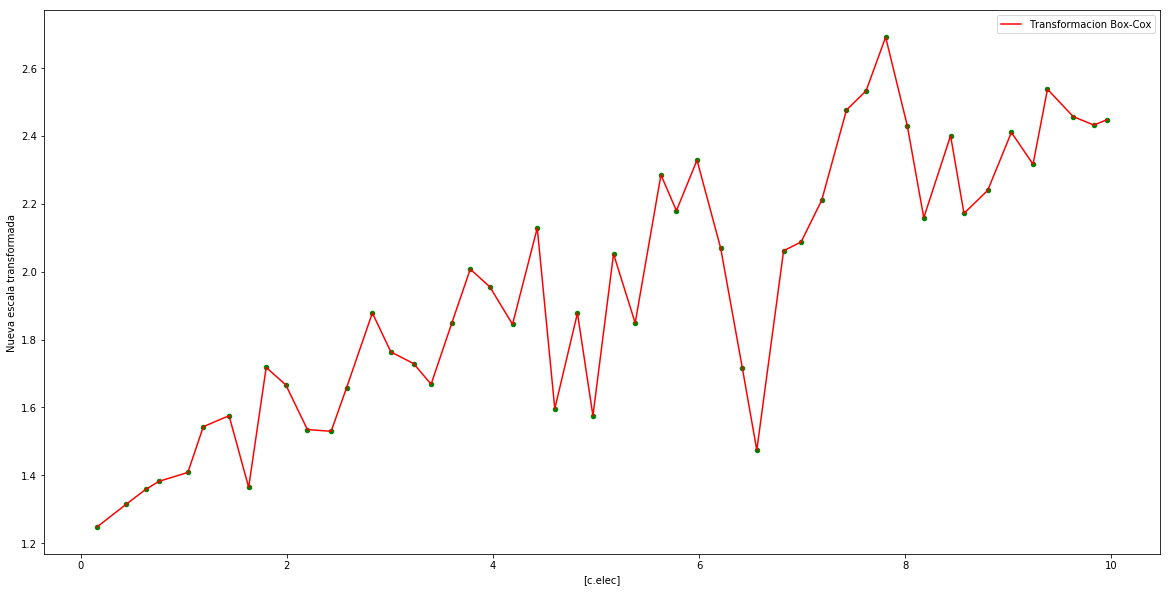

In [332]:
ax=datos.plot(x='c.elec',y='Transformacion Box-Cox',color='red')
ax=datos.plot.scatter(x=['c.elec'],y=['Transformacion Box-Cox'],ax=ax,color='green')
ax=ax.set_ylabel('Nueva escala transformada')

<center><b>Figura 3.</b> Respuesta transformada.</center>
<p>
Es interesante ver como parecen ser exactamente la misma gráfica, sin embargo, la escala de la respuesta se ha modificado. Es decir su escala cambió aunque parece ser un escalamiento lineal. Ahora veamos $y$ y $y^{(\lambda)}$ contra $x$, es decir, el consumo de agua y la posterior transformacion del consumo de agua por <b>Box-Cox</b> , contra $x$.

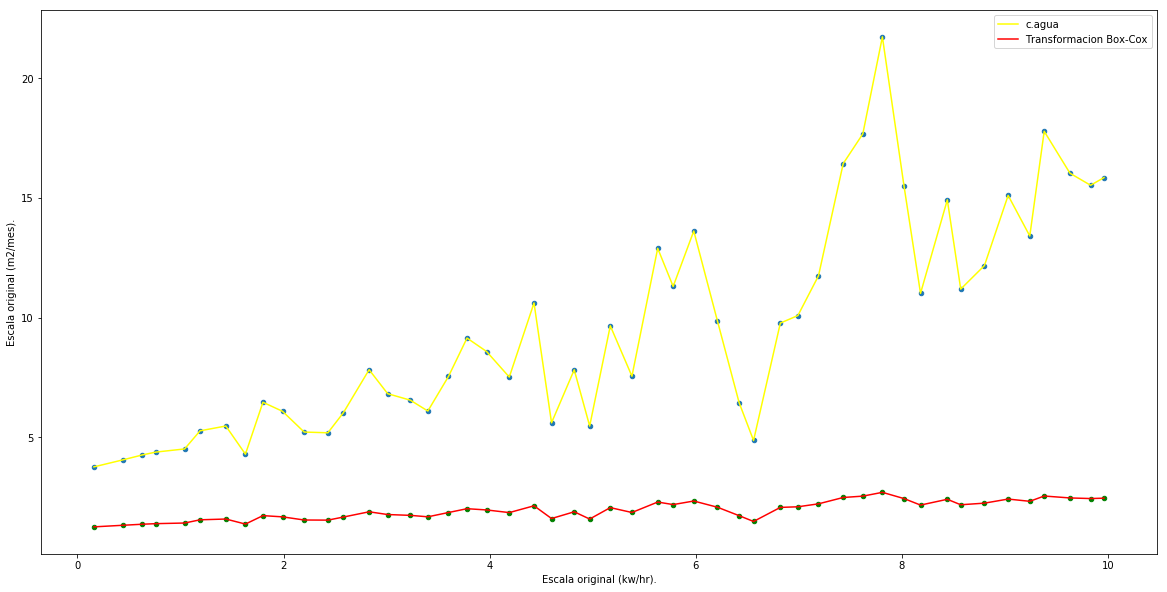

In [334]:
ax=datos.plot(x='c.elec',y='c.agua',color='yellow')
ax=datos.plot.scatter(x='c.elec',y='c.agua',ax=ax)
ax=datos.plot(x='c.elec',y='Transformacion Box-Cox',color='red',ax=ax)
ax=datos.plot.scatter(x=['c.elec'],y=['Transformacion Box-Cox'],ax=ax,color='green')
ax.set_ylabel('Escala original (m2/mes).')
label=ax.set_xlabel('Escala original (kw/hr).')

<center><b>Figura 4.</b> Respuesta y respuesta ajustada.</center>

Claramente si ajustamos un nuevo modelo lineal este tendrá una mucho menor $\beta1$. Además que parece que la varianza de la respuesta transformada se reduce.

#### 2.2.f) Ajustar nuevo modelo lineal a la transformacion de la respuesta y validación del nuevo modelo:

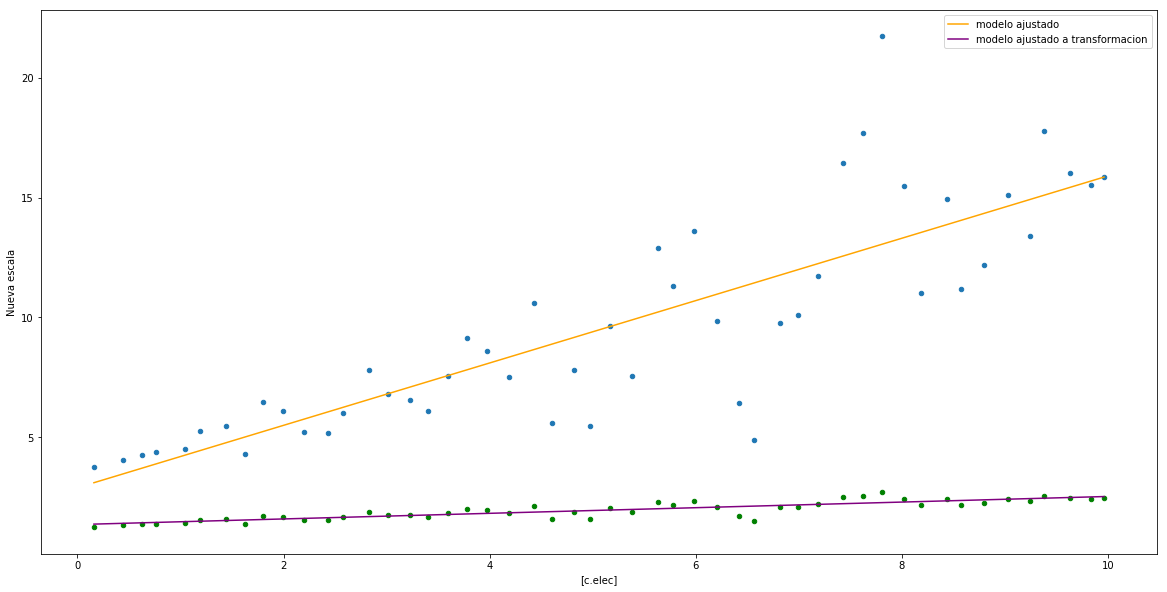

In [371]:
lm = linear_model.LinearRegression()
model = lm.fit(X,y_transformada)
Y_transformada=model.predict(X)
datos['modelo ajustado a transformacion']=Y_transformada
ax=datos.plot(x='c.elec',y='modelo ajustado',color='orange')
ax=datos.plot.scatter(x=['c.elec'],y=['c.agua'],ax=ax)
ax=datos.plot(x='c.elec',y='modelo ajustado a transformacion',color='purple',ax=ax)
ax=datos.plot.scatter(x=['c.elec'],y=['Transformacion Box-Cox'],ax=ax,color='green')
ax=ax.set_ylabel('Nueva escala')

<center><b>Figura 5.</b> Ambos modelos ajustados</center>
El nuevo modelo con nueva $\beta0$:

In [364]:
model.intercept_

1.3448026835597227

y nueva $\beta1$:

In [365]:
model.coef_[0]

0.1173869158091458

y $R^2$ de:

In [366]:
model.score(X,Y_transformada)

1.0

<mark>falta</mark>

#### 2.2.g) 
<mark>falta</mark>



#### 2.2.h)
<mark>falta</mark>



## Conclusiones